In [1]:
# Import pandas
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read 'clinical_data.csv' into a DataFrame: clinical_data
clinical_data = pd.read_csv('clinical_data.csv')

# Read 'demographics.csv' into a DataFrame: demographics
demographics = pd.read_csv('demographics.csv')

# Read 'bill_id.csv' into a DataFrame: bill_id
bill_id = pd.read_csv('bill_id.csv')

# Read 'bill_amount.csv' into a DataFrame: bill_amount
bill_amount = pd.read_csv('bill_amount.csv')

# Print the first five rows of clinical_data
print(clinical_data.head())

                                 id date_of_admission date_of_discharge  \
0  1d21f2be18683991eb93d182d6b2d220        2011-01-01        2011-01-11   
1  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01        2011-01-11   
2  c85cf97bc6307ded0dd4fef8bad2fa09        2011-01-02        2011-01-13   
3  e0397dd72caf4552c5babebd3d61736c        2011-01-02        2011-01-14   
4  94ade3cd5f66f4584902554dff170a29        2011-01-08        2011-01-16   

   medical_history_1  medical_history_2 medical_history_3  medical_history_4  \
0                  0                1.0                 0                  0   
1                  0                0.0                 0                  0   
2                  0                0.0                 0                  0   
3                  0                1.0                No                  0   
4                  0                0.0                No                  0   

   medical_history_5  medical_history_6  medical_history_7   ...    

In [2]:
# Merge bill_id and bill_amount, sharing the common bill_id column, using Inner Join
# Why Inner Join? Because every bill must have a corresponding amount, and vice-versa
bill = pd.merge(left=bill_id, right=bill_amount, on="bill_id", how="inner")
bill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 0 to 13599
Data columns (total 4 columns):
bill_id              13600 non-null int64
patient_id           13600 non-null object
date_of_admission    13600 non-null object
amount               13600 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 531.2+ KB


In [3]:
# Convert the date_of_admission column into pandas date-time
bill['date_of_admission'] = pd.to_datetime(bill['date_of_admission'])

In [4]:
print(bill['date_of_admission'].head())

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: date_of_admission, dtype: datetime64[ns]


In [5]:
# Verifying changes made
bill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 0 to 13599
Data columns (total 4 columns):
bill_id              13600 non-null int64
patient_id           13600 non-null object
date_of_admission    13600 non-null datetime64[ns]
amount               13600 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 531.2+ KB


In [6]:
# Rename id in clinical_data to patient_id, because they are the same
clinical_data.rename(columns={'id':'patient_id'}, inplace=True)

In [7]:
# Merge demographics and clinical_data, on the common patient_id column, using Right Join
# Why Right Join? Because it is possible for a patient to be admitted more than once
patient = pd.merge(left=demographics, right=clinical_data, on="patient_id", how="right")
patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 0 to 3399
Data columns (total 30 columns):
patient_id            3400 non-null object
gender                3400 non-null object
race                  3400 non-null object
resident_status       3400 non-null object
date_of_birth         3400 non-null object
date_of_admission     3400 non-null object
date_of_discharge     3400 non-null object
medical_history_1     3400 non-null int64
medical_history_2     3167 non-null float64
medical_history_3     3400 non-null object
medical_history_4     3400 non-null int64
medical_history_5     3096 non-null float64
medical_history_6     3400 non-null int64
medical_history_7     3400 non-null int64
preop_medication_1    3400 non-null int64
preop_medication_2    3400 non-null int64
preop_medication_3    3400 non-null int64
preop_medication_4    3400 non-null int64
preop_medication_5    3400 non-null int64
preop_medication_6    3400 non-null int64
symptom_1             3400 non-null int64

In [8]:
# Convert date_of_admission, date_of_discharge, and date_of_birth into pandas date-time
patient['date_of_admission'] = pd.to_datetime(patient['date_of_admission'])
patient['date_of_discharge'] = pd.to_datetime(patient['date_of_discharge'])
patient['date_of_birth'] = pd.to_datetime(patient['date_of_birth'])

In [9]:
# Calculate age of the patient at the time of admission
# We do this by calculating the time that has passed since the birth of the patient, until admission
patient['age'] = patient['date_of_admission'] - patient['date_of_birth']

# The result of the above is calculated in days, hence we need to convert it into whole years
patient['age'] = patient['age'].astype('timedelta64[Y]')
patient['age'] = patient['age'].astype(int)

# Verifying that the above steps went through smoothly
print(patient['age'].head())

0    43
1    38
2    28
3    30
4    68
Name: age, dtype: int32


In [10]:
# Create age categories
patient['age_cat'] = np.nan
lst = [patient]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    
patient['age_cat'] = patient['age_cat'].astype('category')

In [11]:
patient['height_m'] = patient['height'] / 100
patient['height_m'].head()

0    1.61
1    1.51
2    1.75
3    1.75
4    1.80
Name: height_m, dtype: float64

In [12]:
patient['height_m_squared'] = patient['height_m'] ** 2
patient['height_m_squared'].head()

0    2.5921
1    2.2801
2    3.0625
3    3.0625
4    3.2400
Name: height_m_squared, dtype: float64

In [13]:
# Calculating BMI (Body Mass Index)
patient['bmi'] = patient['weight'] / patient['height_m_squared']
patient['bmi'].head()

0    26.272135
1    33.551160
2    22.759184
3    21.779592
4    29.907407
Name: bmi, dtype: float64

In [14]:
patient['bmi_cat'] = np.nan
lst = [patient]

for col in lst:
    col.loc[col['bmi'] < 19, 'bmi_cat'] = 'Underweight'
    col.loc[(col['bmi'] >= 19) & (col['bmi'] <= 29), 'bmi_cat'] = 'Healthy'
    col.loc[col['bmi'] > 29, 'bmi_cat'] = 'Overweight'
    
patient['bmi_cat'] = patient['bmi_cat'].astype('category')

In [15]:
# Move age, age_cat, bmi, bmi_cat from the right-side end to the appropriate demographics section within the dataframe
patient_cols = list(patient.columns.values)
patient = patient[['patient_id', 'age', 'age_cat', 'bmi', 'bmi_cat', 'gender', 'race', 'resident_status', 'date_of_birth', 'date_of_admission', 'date_of_discharge', 'medical_history_1', 'medical_history_2', 'medical_history_3', 'medical_history_4', 'medical_history_5', 'medical_history_6', 'medical_history_7', 'preop_medication_1', 'preop_medication_2', 'preop_medication_3', 'preop_medication_4', 'preop_medication_5', 'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height', 'height_m', 'height_m_squared']]

In [16]:
# Convert gender into categorical
patient['gender'] = patient['gender'].astype('category')
patient['gender'].head()

# We assume that f stand for Female, and m for Male, hence making the below replacements
patient['gender'] = patient['gender'].replace('f', 'Female')
patient['gender'] = patient['gender'].replace('m', 'Male')

# Remove redundant categories, f and m
patient['gender'] = patient['gender'].cat.remove_unused_categories()
patient['gender'].head()

0    Female
1    Female
2      Male
3      Male
4      Male
Name: gender, dtype: category
Categories (2, object): [Female, Male]

In [17]:
# Convert race into categorical
patient['race'] = patient['race'].astype('category')
patient['race'].head()

# chinese with a lowercase 'c', and Chinese with an uppercase 'C', are different categories which doesn't make sense
# India is not a race, it is assumed it stands for Indian
patient['race'] = patient['race'].replace('chinese', 'Chinese')
patient['race'] = patient['race'].replace('India', 'Indian')

# Remove redundant categories, 'chinese' and 'India'
patient['race'] = patient['race'].cat.remove_unused_categories()
patient['race'].head()

0     Indian
1    Chinese
2    Chinese
3    Chinese
4      Malay
Name: race, dtype: category
Categories (4, object): [Chinese, Indian, Malay, Others]

In [18]:
# Convert resident_status into categorical
patient['resident_status'] = patient['resident_status'].astype('category')
patient['resident_status'].head()

# It is assumed that Singaporean citizen and Singaporean are one and the same
patient['resident_status'] = patient['resident_status'].replace('Singapore citizen', 'Singaporean')

# Remove redundant category, 'Singapore citizen'
patient['resident_status'] = patient['resident_status'].cat.remove_unused_categories()
patient['resident_status'].head()

0    Singaporean
1    Singaporean
2    Singaporean
3    Singaporean
4    Singaporean
Name: resident_status, dtype: category
Categories (3, object): [Foreigner, PR, Singaporean]

In [19]:
# Convert medical_history_1 into categorical
patient['medical_history_1'] = patient['medical_history_1'].astype('category')
patient['medical_history_1'].head()

0    0
1    0
2    0
3    0
4    0
Name: medical_history_1, dtype: category
Categories (2, int64): [0, 1]

In [20]:
# Convert medical history_2 into categorical
patient['medical_history_2'] = patient['medical_history_2'].fillna('999')
patient['medical_history_2'] = patient['medical_history_2'].astype(int)
patient['medical_history_2'] = patient['medical_history_2'].astype('category')
patient['medical_history_2'].head()

0    0
1    0
2    0
3    0
4    1
Name: medical_history_2, dtype: category
Categories (3, int64): [0, 1, 999]

In [21]:
# It is assumed that 'No' corresponds to 0, and 'Yes' corresponds to 1.
patient['medical_history_3'] = patient['medical_history_3'].replace('No', '0')
patient['medical_history_3'] = patient['medical_history_3'].replace('Yes', '1')
patient['medical_history_3'] = patient['medical_history_3'].astype(int)

# Convert medical_history_3 into categorical
patient['medical_history_3'] = patient['medical_history_3'].astype('category')
patient['medical_history_3'].head()

# Remove unwanted categories, 'No' and 'Yes'
patient['medical_history_3'] = patient['medical_history_3'].cat.remove_unused_categories()
patient['medical_history_3'].head()

0    0
1    0
2    0
3    0
4    0
Name: medical_history_3, dtype: category
Categories (2, int64): [0, 1]

In [22]:
# Convert medical_history_4 into categorical
patient['medical_history_4'] = patient['medical_history_4'].astype('category')
patient['medical_history_4'].head()

0    0
1    0
2    0
3    1
4    0
Name: medical_history_4, dtype: category
Categories (2, int64): [0, 1]

In [23]:
# Convert medical_history_5 into categorical
patient['medical_history_5'] = patient['medical_history_5'].fillna('999')
patient['medical_history_5'] = patient['medical_history_5'].astype(int)
patient['medical_history_5'] = patient['medical_history_5'].astype('category')
patient['medical_history_5'].head()

0      0
1    999
2      0
3    999
4      0
Name: medical_history_5, dtype: category
Categories (3, int64): [0, 1, 999]

In [24]:
# Convert medical_history_6 into categorical
patient['medical_history_6'] = patient['medical_history_6'].astype('category')
patient['medical_history_6'].head()

0    0
1    0
2    1
3    0
4    0
Name: medical_history_6, dtype: category
Categories (2, int64): [0, 1]

In [25]:
# Convert medical_history_7 into categorical
patient['medical_history_7'] = patient['medical_history_7'].astype('category')
patient['medical_history_7'].head()

0    1
1    1
2    0
3    0
4    0
Name: medical_history_7, dtype: category
Categories (2, int64): [0, 1]

In [26]:
# Convert preop_medication_1 into categorical
patient['preop_medication_1'] = patient['preop_medication_1'].astype('category')
patient['preop_medication_1'].head()

0    1
1    0
2    0
3    1
4    0
Name: preop_medication_1, dtype: category
Categories (2, int64): [0, 1]

In [27]:
# Convert preop_medication_2 into categorical
patient['preop_medication_2'] = patient['preop_medication_2'].astype('category')
patient['preop_medication_2'].head()

0    0
1    0
2    1
3    1
4    1
Name: preop_medication_2, dtype: category
Categories (2, int64): [0, 1]

In [28]:
# Convert preop_medication_3 into categorical
patient['preop_medication_3'] = patient['preop_medication_3'].astype('category')
patient['preop_medication_3'].head()

0    1
1    0
2    1
3    0
4    0
Name: preop_medication_3, dtype: category
Categories (2, int64): [0, 1]

In [29]:
# Convert preop_medication_4 into categorical
patient['preop_medication_4'] = patient['preop_medication_4'].astype('category')
patient['preop_medication_4'].head()

0    0
1    1
2    1
3    1
4    0
Name: preop_medication_4, dtype: category
Categories (2, int64): [0, 1]

In [30]:
# Convert preop_medication_5 into categorical
patient['preop_medication_5'] = patient['preop_medication_5'].astype('category')
patient['preop_medication_5'].head()

0    1
1    1
2    1
3    0
4    1
Name: preop_medication_5, dtype: category
Categories (2, int64): [0, 1]

In [31]:
# Convert preop_medication_6 into categorical
patient['preop_medication_6'] = patient['preop_medication_6'].astype('category')
patient['preop_medication_6'].head()

0    1
1    1
2    0
3    1
4    1
Name: preop_medication_6, dtype: category
Categories (2, int64): [0, 1]

In [32]:
# Convert symptom_1 into categorical
patient['symptom_1'] = patient['symptom_1'].astype('category')
patient['symptom_1'].head()

0    1
1    1
2    0
3    1
4    1
Name: symptom_1, dtype: category
Categories (2, int64): [0, 1]

In [33]:
# Convert symptom_2 into categorical
patient['symptom_2'] = patient['symptom_2'].astype('category')
patient['symptom_2'].head()

0    1
1    1
2    0
3    0
4    1
Name: symptom_2, dtype: category
Categories (2, int64): [0, 1]

In [34]:
# Convert symptom_3 into categorical
patient['symptom_3'] = patient['symptom_3'].astype('category')
patient['symptom_3'].head()

0    0
1    1
2    1
3    0
4    1
Name: symptom_3, dtype: category
Categories (2, int64): [0, 1]

In [35]:
# Convert symptom_4 into categorical
patient['symptom_4'] = patient['symptom_4'].astype('category')
patient['symptom_4'].head()

0    0
1    1
2    1
3    1
4    1
Name: symptom_4, dtype: category
Categories (2, int64): [0, 1]

In [36]:
# Convert symptom_5 into categorical
patient['symptom_5'] = patient['symptom_5'].astype('category')
patient['symptom_5'].head()

0    1
1    1
2    1
3    0
4    1
Name: symptom_5, dtype: category
Categories (2, int64): [0, 1]

In [37]:
# Verifying changes made
patient.info()
# For now, we will ignore the missing values in 'medical_history_2' (233) and 'medical_history_5' (304)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 0 to 3399
Data columns (total 36 columns):
patient_id            3400 non-null object
age                   3400 non-null int32
age_cat               3400 non-null category
bmi                   3400 non-null float64
bmi_cat               3400 non-null category
gender                3400 non-null category
race                  3400 non-null category
resident_status       3400 non-null category
date_of_birth         3400 non-null datetime64[ns]
date_of_admission     3400 non-null datetime64[ns]
date_of_discharge     3400 non-null datetime64[ns]
medical_history_1     3400 non-null category
medical_history_2     3400 non-null category
medical_history_3     3400 non-null category
medical_history_4     3400 non-null category
medical_history_5     3400 non-null category
medical_history_6     3400 non-null category
medical_history_7     3400 non-null category
preop_medication_1    3400 non-null category
preop_medication_2    3400

In [38]:
# Merge the two dataframes, patient and bill, using a Right Join, on the common patient_id and date_of_admission columns
# Why Right Join? Because a patient can have multiple bills
# It is important to use the date of admission along with patient id for this join
merged = pd.merge(patient, bill, on=['patient_id', 'date_of_admission'], how="right")

In [39]:
# Make sure patient and bill were merged smoothly
print(merged.head())

                         patient_id  age       age_cat        bmi     bmi_cat  \
0  fa2d818b2261e44e30628ad1ac9cc72c   43  Senior Adult  26.272135     Healthy   
1  fa2d818b2261e44e30628ad1ac9cc72c   43  Senior Adult  26.272135     Healthy   
2  fa2d818b2261e44e30628ad1ac9cc72c   43  Senior Adult  26.272135     Healthy   
3  fa2d818b2261e44e30628ad1ac9cc72c   43  Senior Adult  26.272135     Healthy   
4  5b6477c5de78d0b138e3b0c18e21d0ae   38  Senior Adult  33.551160  Overweight   

   gender     race resident_status date_of_birth date_of_admission  \
0  Female   Indian     Singaporean    1971-05-14        2014-09-20   
1  Female   Indian     Singaporean    1971-05-14        2014-09-20   
2  Female   Indian     Singaporean    1971-05-14        2014-09-20   
3  Female   Indian     Singaporean    1971-05-14        2014-09-20   
4  Female  Chinese     Singaporean    1976-02-18        2014-08-08   

       ...      symptom_5 lab_result_1 lab_result_2 lab_result_3 weight  \
0      ...       

In [40]:
# Export the three dataframes to CSV
merged.to_csv('merged.csv')
patient.to_csv('patient.csv')
bill.to_csv('bill.csv')

In [41]:
# Sanity check
print(patient.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3400 entries, 0 to 3399
Data columns (total 36 columns):
patient_id            3400 non-null object
age                   3400 non-null int32
age_cat               3400 non-null category
bmi                   3400 non-null float64
bmi_cat               3400 non-null category
gender                3400 non-null category
race                  3400 non-null category
resident_status       3400 non-null category
date_of_birth         3400 non-null datetime64[ns]
date_of_admission     3400 non-null datetime64[ns]
date_of_discharge     3400 non-null datetime64[ns]
medical_history_1     3400 non-null category
medical_history_2     3400 non-null category
medical_history_3     3400 non-null category
medical_history_4     3400 non-null category
medical_history_5     3400 non-null category
medical_history_6     3400 non-null category
medical_history_7     3400 non-null category
preop_medication_1    3400 non-null category
preop_medication_2    3400

In [42]:
# Encoding all categorical variables
from sklearn.preprocessing import LabelEncoder
# Gender
le = LabelEncoder()
le.fit(merged['gender'].drop_duplicates()) 
merged['gender'] = le.transform(merged['gender'])
# Age Category
le.fit(merged['age_cat'].drop_duplicates()) 
merged['age_cat'] = le.transform(merged['age_cat'])
# BMI Category
le.fit(merged['bmi_cat'].drop_duplicates()) 
merged['bmi_cat'] = le.transform(merged['bmi_cat'])
# Race
le.fit(merged['race'].drop_duplicates()) 
merged['race'] = le.transform(merged['race'])
# Resident Status
le.fit(merged['resident_status'].drop_duplicates()) 
merged['resident_status'] = le.transform(merged['resident_status'])

In [43]:
# For loop to encode medical_history_x
for hist in range(1, 8):
    le.fit(merged['medical_history_{0}'.format(hist)].drop_duplicates()) 
    merged['medical_history_{0}'.format(hist)] = le.transform(merged['medical_history_{0}'.format(hist)])

In [44]:
# For loop to encode preop_medication_x
for preop in range(1, 7):
    le.fit(merged['preop_medication_{0}'.format(preop)].drop_duplicates()) 
    merged['preop_medication_{0}'.format(preop)] = le.transform(merged['preop_medication_{0}'.format(preop)])

In [45]:
# For loop to encode symptom_x
for symp in range(1, 6):
    le.fit(merged['symptom_{0}'.format(symp)].drop_duplicates()) 
    merged['symptom_{0}'.format(symp)] = le.transform(merged['symptom_{0}'.format(symp)])

In [46]:
# Calculate correlation for amount
merged.corr()['amount'].sort_values(ascending=False)

amount                1.000000
symptom_5             0.169990
race                  0.108548
age                   0.107097
medical_history_1     0.074510
symptom_3             0.060520
symptom_2             0.051912
weight                0.051811
medical_history_6     0.046590
bmi                   0.046170
symptom_4             0.042839
symptom_1             0.042208
bmi_cat               0.037171
gender                0.018992
medical_history_7     0.012813
preop_medication_2    0.010612
height_m_squared      0.008582
height_m              0.008571
height                0.008571
preop_medication_6    0.007107
medical_history_2     0.006278
preop_medication_1    0.005300
preop_medication_4    0.004998
medical_history_3     0.003796
bill_id               0.002955
preop_medication_3    0.002579
preop_medication_5    0.000149
lab_result_3          0.000030
lab_result_2         -0.001821
lab_result_1         -0.002144
medical_history_5    -0.003054
medical_history_4    -0.003078
age_cat 

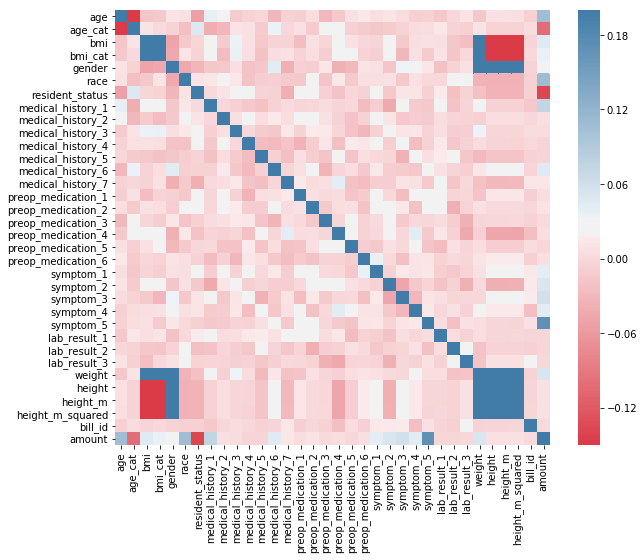

In [47]:
# Generate heatmap of correlation of amount, using seaborn
f, ax = plt.subplots(figsize=(10, 8))
corr = merged.corr()
sns.heatmap(corr, vmin=-0.15, vmax=0.20, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(10,240,as_cmap=True),
            square=True, ax=ax, xticklabels=True, yticklabels=True)

In [48]:
# Generating distribution table using Bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of bill amount",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(merged['amount'])
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot(p,ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

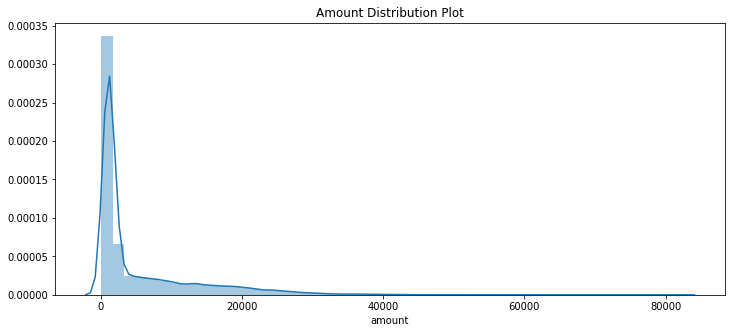

In [49]:
# Distribution Plot using Seaborn
plt.figure(figsize=(12,5))
plt.title("Amount Distribution Plot")
ax = sns.distplot(merged["amount"])

Text(0.5,1,'Distribution of amount for Foreigners')

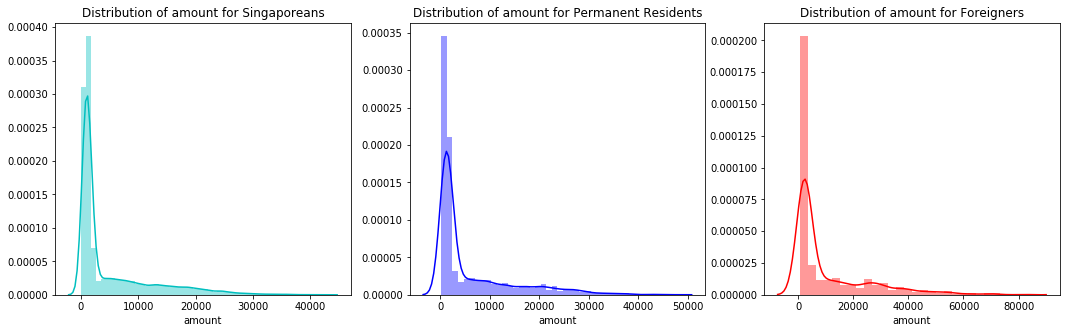

In [50]:
# Generate distribution table, by resident status
f = plt.figure(figsize=(18,5))

ax=f.add_subplot(131)
sns.distplot(merged[(merged.resident_status == 2)]['amount'],color='c',ax=ax)
ax.set_title('Distribution of amount for Singaporeans')

ax=f.add_subplot(132)
sns.distplot(merged[(merged.resident_status == 1)]['amount'],color='b',ax=ax)
ax.set_title('Distribution of amount for Permanent Residents')

ax=f.add_subplot(133)
sns.distplot(merged[(merged.resident_status == 0)]['amount'],color='r',ax=ax)
ax.set_title('Distribution of amount for Foreigners')

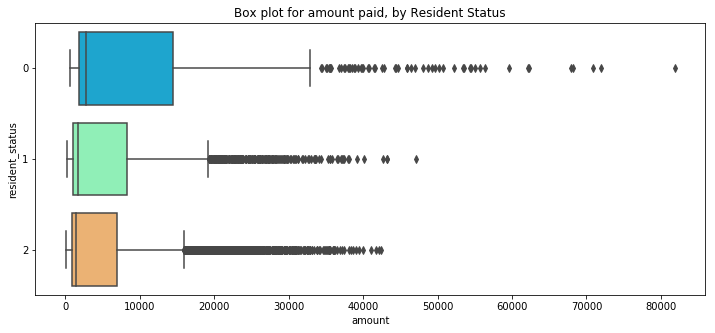

In [51]:
# Box plot for amount paid, by Resident Status
plt.figure(figsize=(12,5))
plt.title("Box plot for amount paid, by Resident Status")
sns.boxplot(x="amount", y="resident_status", data=merged, orient="h", palette = 'rainbow')

Text(0.5,1,'Amount Distribution, Race: Chinese')

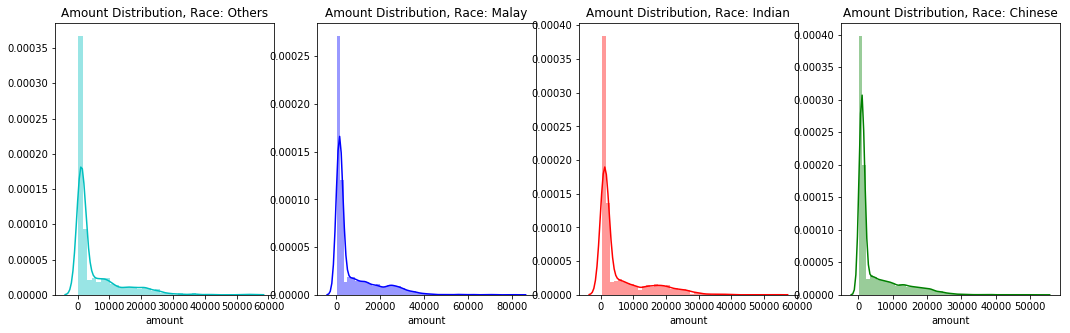

In [52]:
# Amount Distribution, Race
f = plt.figure(figsize=(18,5))

ax=f.add_subplot(141)
sns.distplot(merged[(merged.race == 3)]['amount'],color='c',ax=ax)
ax.set_title('Amount Distribution, Race: Others')

ax=f.add_subplot(142)
sns.distplot(merged[(merged.race == 2)]['amount'],color='b',ax=ax)
ax.set_title('Amount Distribution, Race: Malay')

ax=f.add_subplot(143)
sns.distplot(merged[(merged.race == 1)]['amount'],color='r',ax=ax)
ax.set_title('Amount Distribution, Race: Indian')

ax=f.add_subplot(144)
sns.distplot(merged[(merged.race == 0)]['amount'],color='g',ax=ax)
ax.set_title('Amount Distribution, Race: Chinese')

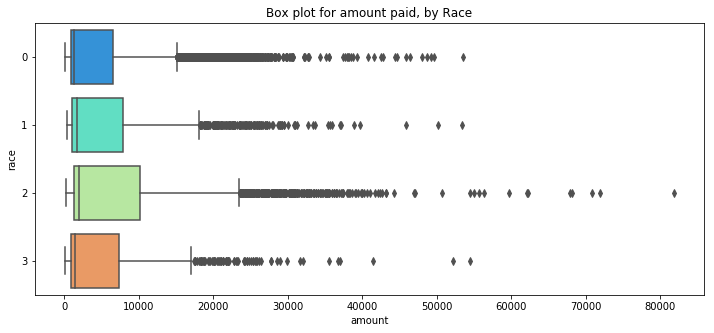

In [53]:
# Amount Box plot, Race
plt.figure(figsize=(12,5))
plt.title("Box plot for amount paid, by Race")
sns.boxplot(x="amount", y="race", data=merged, orient="h", palette = 'rainbow')

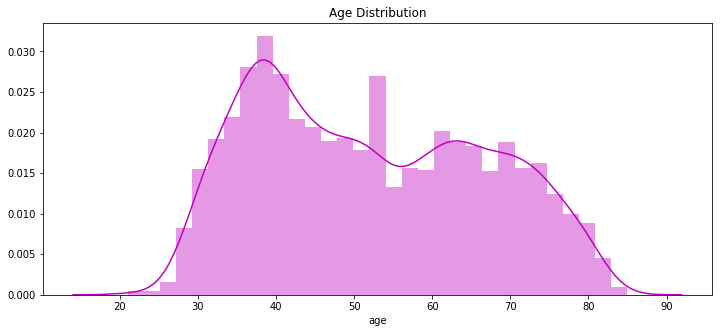

In [54]:
# Age Distribution Plot
plt.figure(figsize=(12,5))
plt.title("Age Distribution")
ax = sns.distplot(merged["age"], color = 'm')

Text(0.5,1,'Amount Distribution, Elder')

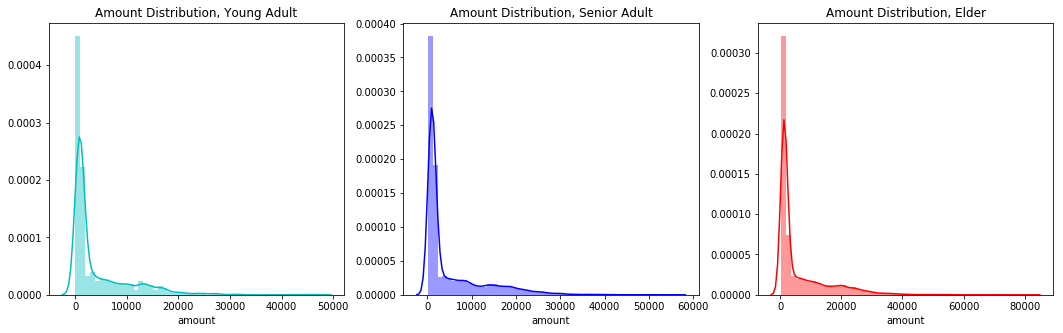

In [55]:
# Amount Distribution, Age Category
f = plt.figure(figsize=(18,5))

ax=f.add_subplot(131)
sns.distplot(merged[(merged.age_cat == 2)]['amount'],color='c',ax=ax)
ax.set_title('Amount Distribution, Young Adult')

ax=f.add_subplot(132)
sns.distplot(merged[(merged.age_cat == 1)]['amount'],color='b',ax=ax)
ax.set_title('Amount Distribution, Senior Adult')

ax=f.add_subplot(133)
sns.distplot(merged[(merged.age_cat == 0)]['amount'],color='r',ax=ax)
ax.set_title('Amount Distribution, Elder')

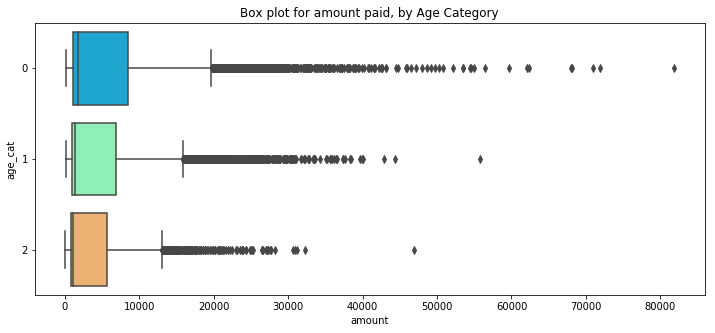

In [56]:
# Box Plot, Amount by Age Category
plt.figure(figsize=(12,5))
plt.title("Box plot for amount paid, by Age Category")
sns.boxplot(x="amount", y="age_cat", data=merged, orient="h", palette = 'rainbow')

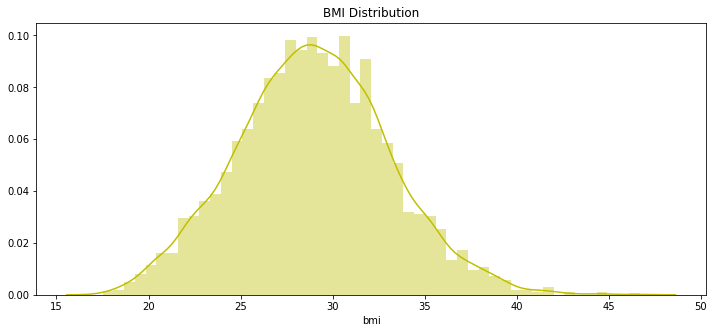

In [57]:
# BMI Distribution Plot
plt.figure(figsize=(12,5))
plt.title("BMI Distribution")
ax = sns.distplot(merged["bmi"], color = 'y')

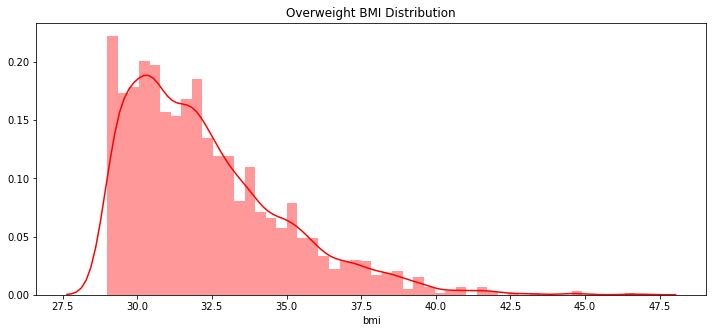

In [58]:
# Overweight BMI Distribution
plt.figure(figsize=(12,5))
plt.title("Overweight BMI Distribution")
ax = sns.distplot(merged[merged.bmi_cat == 1]['bmi'], color = 'r')

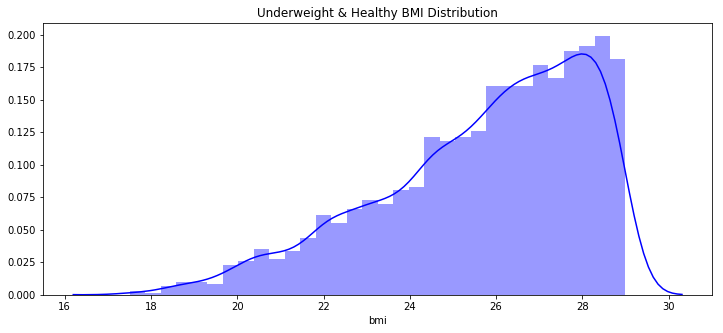

In [59]:
# Underweight & Healthy BMI Distribution Plot
plt.figure(figsize=(12,5))
plt.title("Underweight & Healthy BMI Distribution")
ax = sns.distplot(merged[merged.bmi_cat != 1]['bmi'], color = 'b')

Text(0.5,1,'Amount Distribution by BMI, Healthy')

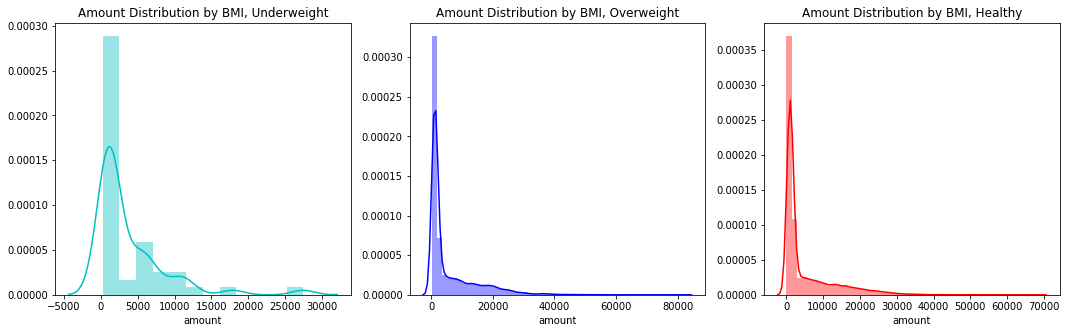

In [60]:
# Amount Distribution, Amount by BMI
f = plt.figure(figsize=(18,5))

ax=f.add_subplot(131)
sns.distplot(merged[(merged.bmi_cat == 2)]['amount'],color='c',ax=ax)
ax.set_title('Amount Distribution by BMI, Underweight')

ax=f.add_subplot(132)
sns.distplot(merged[(merged.bmi_cat == 1)]['amount'],color='b',ax=ax)
ax.set_title('Amount Distribution by BMI, Overweight')

ax=f.add_subplot(133)
sns.distplot(merged[(merged.bmi_cat == 0)]['amount'],color='r',ax=ax)
ax.set_title('Amount Distribution by BMI, Healthy')

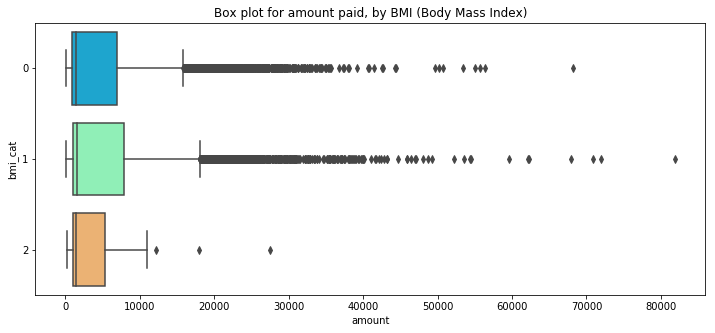

In [61]:
# Box Plot for BMI
plt.figure(figsize=(12,5))
plt.title("Box plot for amount paid, by BMI (Body Mass Index)")
sns.boxplot(x="amount", y="bmi_cat", data=merged, orient="h", palette = 'rainbow')

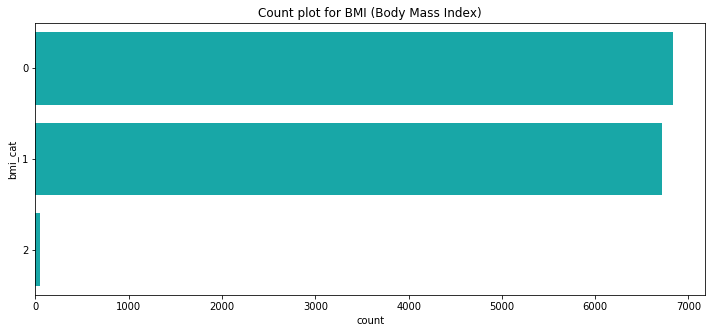

In [62]:
# Count Plot for BMI
plt.figure(figsize=(12,5))
plt.title("Count plot for BMI (Body Mass Index)")
sns.countplot(y="bmi_cat", data=merged, color="c");

In [63]:
# Calculating BMI's correlation with other variables
bmi_cat_corr = merged.corr()['bmi_cat'].sort_values(ascending=False)
print(bmi_cat_corr)

bmi_cat               1.000000
bmi                   0.744750
weight                0.605537
amount                0.037171
medical_history_3     0.037092
preop_medication_4    0.029476
symptom_2             0.024935
medical_history_1     0.024460
preop_medication_5    0.018421
race                  0.011720
lab_result_1          0.010521
symptom_4             0.009221
medical_history_7     0.008624
medical_history_4     0.005978
preop_medication_2    0.005463
medical_history_6     0.005295
age_cat               0.002590
bill_id               0.001085
lab_result_3          0.000780
preop_medication_6   -0.003952
preop_medication_1   -0.004074
resident_status      -0.004942
symptom_1            -0.008330
preop_medication_3   -0.010251
symptom_5            -0.011149
age                  -0.013885
lab_result_2         -0.016165
medical_history_5    -0.020239
medical_history_2    -0.026924
symptom_3            -0.030460
gender               -0.045194
height_m             -0.255110
height  

Text(0.5,1,'Amount Distribution, Gender = Female')

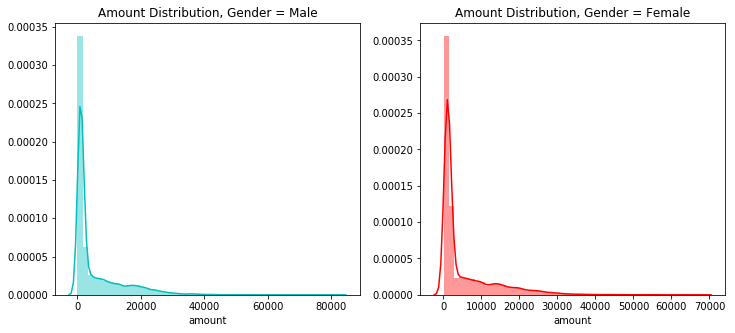

In [64]:
# Amount Distribution, Gender
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(merged[(merged.gender == 1)]['amount'],color='c',ax=ax)
ax.set_title('Amount Distribution, Gender = Male')

ax=f.add_subplot(122)
sns.distplot(merged[(merged.gender == 0)]['amount'],color='r',ax=ax)
ax.set_title('Amount Distribution, Gender = Female')

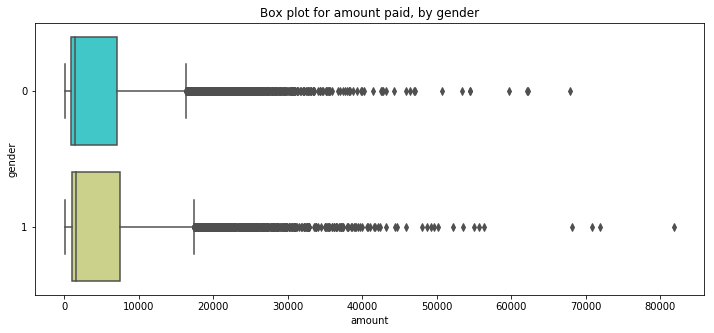

In [65]:
# Box Plot, Gender
plt.figure(figsize=(12,5))
plt.title("Box plot for amount paid, by gender")
sns.boxplot(x="amount", y="gender", data=merged, orient="h", palette = 'rainbow')

In [66]:
# Link between BMI & Medical History
merged.corr()['bmi'].sort_values(ascending=False)

bmi                   1.000000
weight                0.816531
bmi_cat               0.744750
amount                0.046170
medical_history_3     0.033407
medical_history_1     0.027445
symptom_2             0.025944
preop_medication_4    0.021581
age_cat               0.010868
preop_medication_5    0.009436
medical_history_4     0.008062
preop_medication_2    0.007509
symptom_5             0.007419
symptom_4             0.006608
lab_result_1          0.006518
preop_medication_6   -0.000030
resident_status      -0.001295
preop_medication_3   -0.002330
bill_id              -0.003067
symptom_1            -0.003286
medical_history_7    -0.004053
medical_history_6    -0.004627
medical_history_2    -0.011912
symptom_3            -0.012109
race                 -0.014420
medical_history_5    -0.014528
lab_result_2         -0.015005
age                  -0.017271
lab_result_3         -0.023021
preop_medication_1   -0.024385
gender               -0.049172
height_m_squared     -0.328673
height_m

Text(0.5,1,'Amount Distribution, Medical History 1 = No')

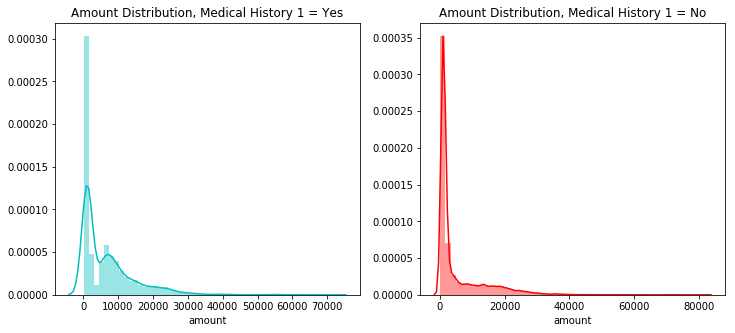

In [67]:
# Amount Distribution by Med Hist 1
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(merged[(merged.medical_history_1 == 1)]['amount'],color='c',ax=ax)
ax.set_title('Amount Distribution, Medical History 1 = Yes')

ax=f.add_subplot(122)
sns.distplot(merged[(merged.medical_history_1 == 0)]['amount'],color='r',ax=ax)
ax.set_title('Amount Distribution, Medical History 1 = No')

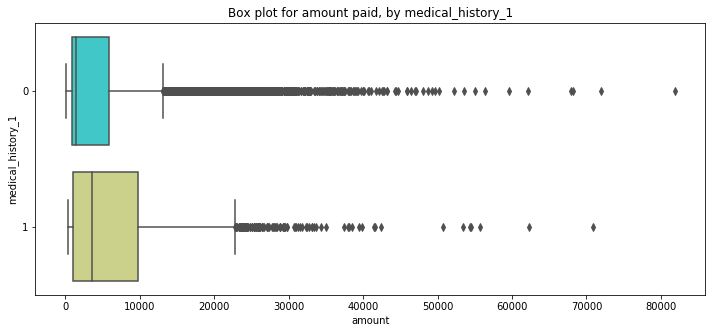

In [68]:
# Box Plot, Med Hist 1
plt.figure(figsize=(12,5))
plt.title("Box plot for amount paid, by medical_history_1")
sns.boxplot(x="amount", y="medical_history_1", data=merged, orient="h", palette = 'rainbow')

Text(0.5,1,'Amount Distribution, Medical History 6 = No')

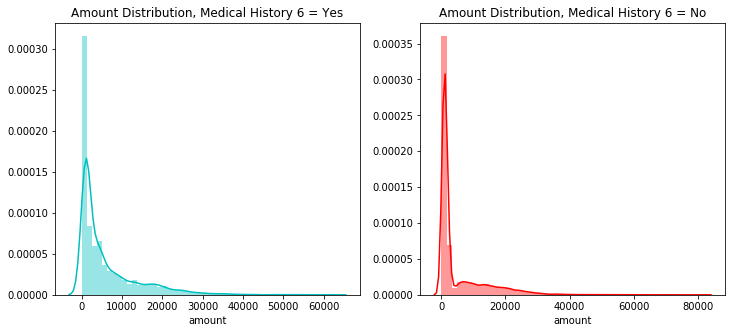

In [69]:
# Amount Distribution, Medical History 6
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(merged[(merged.medical_history_6 == 1)]['amount'],color='c',ax=ax)
ax.set_title('Amount Distribution, Medical History 6 = Yes')

ax=f.add_subplot(122)
sns.distplot(merged[(merged.medical_history_6 == 0)]['amount'],color='r',ax=ax)
ax.set_title('Amount Distribution, Medical History 6 = No')

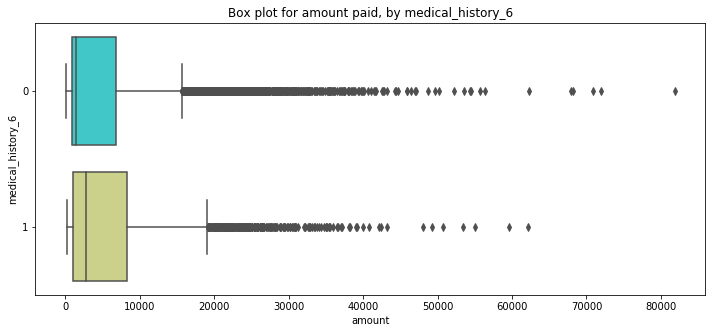

In [70]:
# Box Plot, Amount by Med Hist_6
plt.figure(figsize=(12,5))
plt.title("Box plot for amount paid, by medical_history_6")
sns.boxplot(x="amount", y="medical_history_6", data=merged, orient="h", palette = 'rainbow')

Text(0.5,1,'Distribution of amount paid by patients WITHOUT symptom_1')

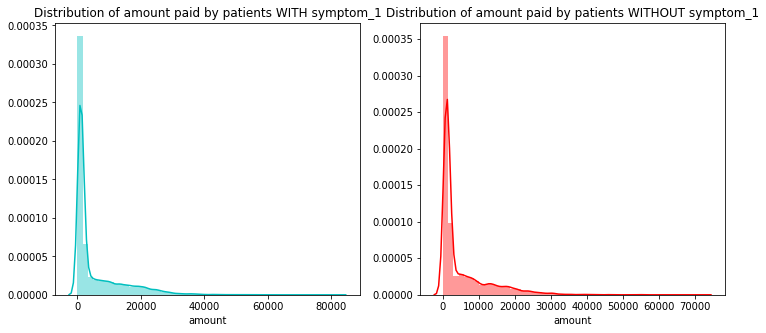

In [71]:
# Symptom 1 Distribution
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(merged[(merged.symptom_1 == 1)]['amount'],color='c',ax=ax)
ax.set_title('Distribution of amount paid by patients WITH symptom_1')

ax=f.add_subplot(122)
sns.distplot(merged[(merged.symptom_1 == 0)]['amount'],color='r',ax=ax)
ax.set_title('Distribution of amount paid by patients WITHOUT symptom_1')

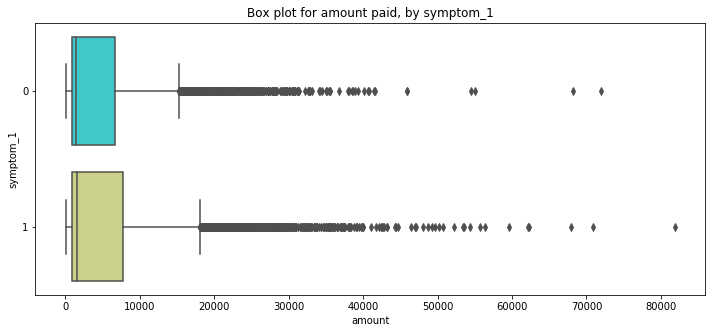

In [72]:
# Symptom 1 Box plot
plt.figure(figsize=(12,5))
plt.title("Box plot for amount paid, by symptom_1")
sns.boxplot(x="amount", y="symptom_1", data=merged, orient="h", palette = 'rainbow')

Text(0.5,1,'Distribution of amount paid by patients WITHOUT symptom_2')

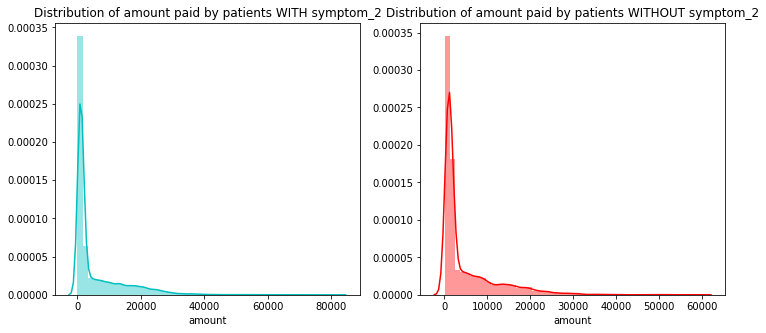

In [73]:
# Symptom 2 Distribution
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(merged[(merged.symptom_2 == 1)]['amount'],color='c',ax=ax)
ax.set_title('Distribution of amount paid by patients WITH symptom_2')

ax=f.add_subplot(122)
sns.distplot(merged[(merged.symptom_2 == 0)]['amount'],color='r',ax=ax)
ax.set_title('Distribution of amount paid by patients WITHOUT symptom_2')

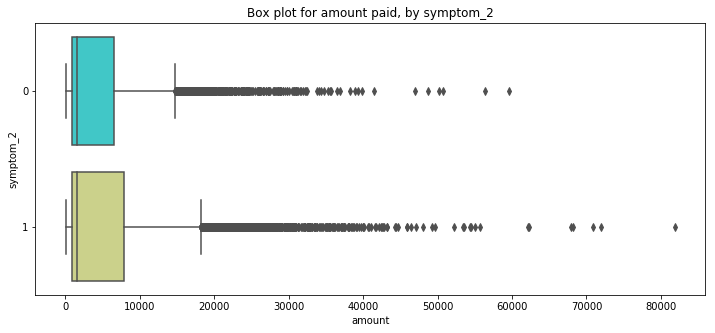

In [74]:
# Box Plot, Symptom 2
plt.figure(figsize=(12,5))
plt.title("Box plot for amount paid, by symptom_2")
sns.boxplot(x="amount", y="symptom_2", data=merged, orient="h", palette = 'rainbow')

Text(0.5,1,'Distribution of amount paid by patients WITHOUT symptom_3')

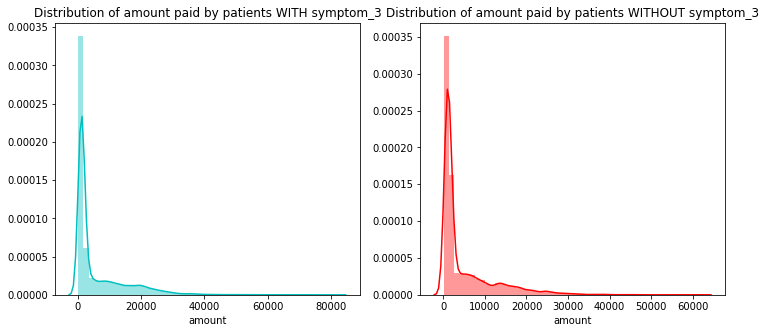

In [75]:
# Distribution, Symptom 3
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(merged[(merged.symptom_3 == 1)]['amount'],color='c',ax=ax)
ax.set_title('Distribution of amount paid by patients WITH symptom_3')

ax=f.add_subplot(122)
sns.distplot(merged[(merged.symptom_3 == 0)]['amount'],color='r',ax=ax)
ax.set_title('Distribution of amount paid by patients WITHOUT symptom_3')

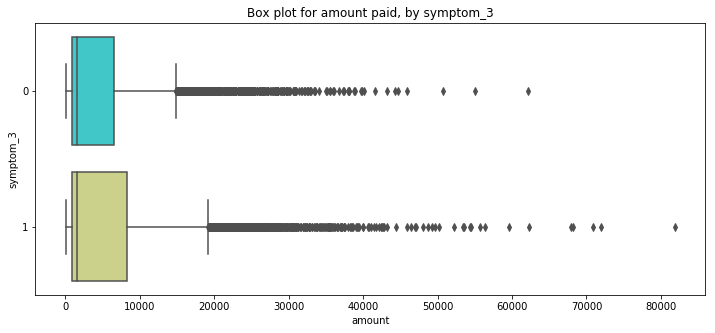

In [76]:
# Box Plot, Symptom 3
plt.figure(figsize=(12,5))
plt.title("Box plot for amount paid, by symptom_3")
sns.boxplot(x="amount", y="symptom_3", data=merged, orient="h", palette = 'rainbow')

Text(0.5,1,'Distribution of amount paid by patients WITHOUT symptom_4')

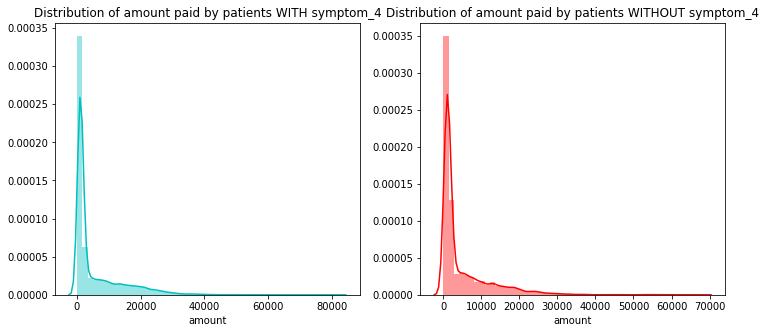

In [77]:
# Distribution, Symptom 4
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(merged[(merged.symptom_4 == 1)]['amount'],color='c',ax=ax)
ax.set_title('Distribution of amount paid by patients WITH symptom_4')

ax=f.add_subplot(122)
sns.distplot(merged[(merged.symptom_4 == 0)]['amount'],color='r',ax=ax)
ax.set_title('Distribution of amount paid by patients WITHOUT symptom_4')

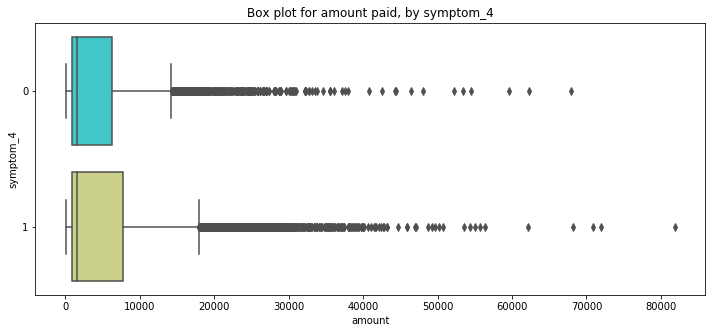

In [78]:
# Box Plot, Symptom 4
plt.figure(figsize=(12,5))
plt.title("Box plot for amount paid, by symptom_4")
sns.boxplot(x="amount", y="symptom_4", data=merged, orient="h", palette = 'rainbow')

Text(0.5,1,'Distribution of amount paid by patients WITHOUT symptom_5')

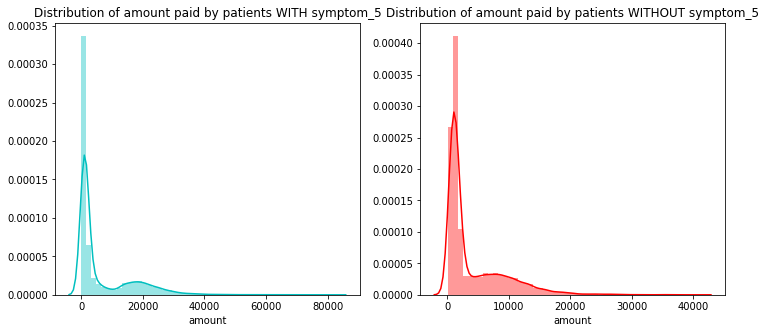

In [79]:
# Symptom 5 Distribution
f = plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(merged[(merged.symptom_5 == 1)]['amount'],color='c',ax=ax)
ax.set_title('Distribution of amount paid by patients WITH symptom_5')

ax=f.add_subplot(122)
sns.distplot(merged[(merged.symptom_5 == 0)]['amount'],color='r',ax=ax)
ax.set_title('Distribution of amount paid by patients WITHOUT symptom_5')

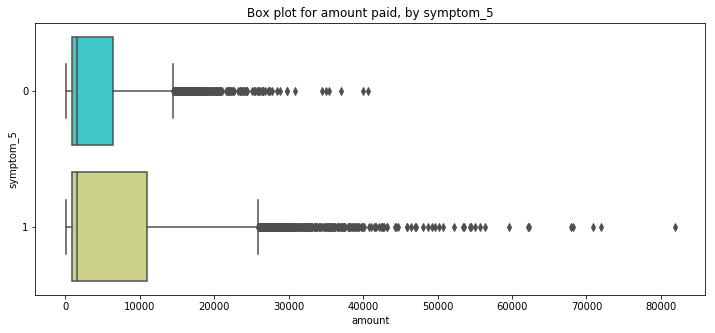

In [80]:
# Box Plot, Symptom 5
plt.figure(figsize=(12,5))
plt.title("Box plot for amount paid, by symptom_5")
sns.boxplot(x="amount", y="symptom_5", data=merged, orient="h", palette = 'rainbow')

Text(0.5,1,'Count, by resident status')

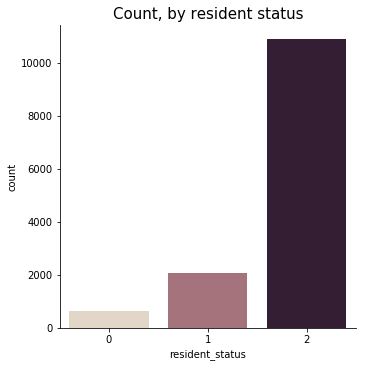

In [81]:
# Count, by race
sns.catplot(x="resident_status", kind="count", palette="ch:.25", data=merged);
plt.title('Count, by resident status', fontsize=15)

Text(0.5,1,'Count, by gender')

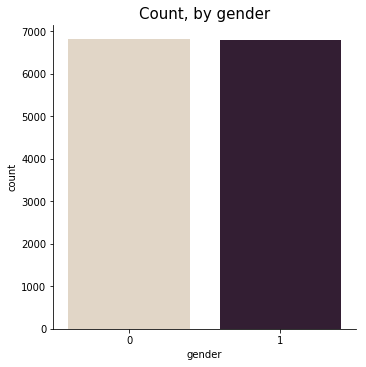

In [82]:
# Count gender
sns.catplot(x="gender", kind="count", palette="ch:.25", data=merged);
plt.title('Count, by gender', fontsize=15)

Text(0.5,1,'amount, by gender')

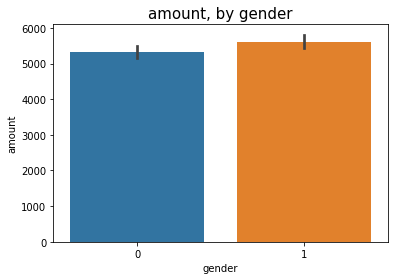

In [83]:
# Amount, by gender
sns.barplot(x=merged['gender'],y = merged['amount'])
plt.title('amount, by gender', fontsize=15)

Text(0.5,1,'medical_history_1, by gender')

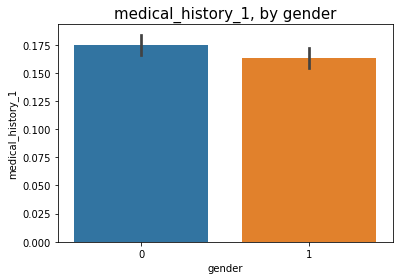

In [84]:
# Med Hist 1 by gender
sns.barplot(x=merged['gender'],y = merged['medical_history_1'])
plt.title('medical_history_1, by gender', fontsize=15)

Text(0.5,1,'medical_history_6, by gender')

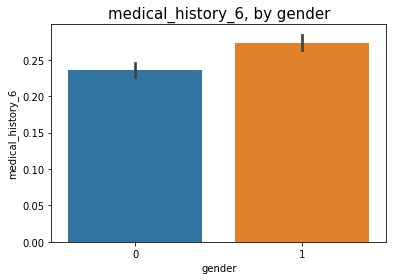

In [85]:
# Med Hist 6 by gender
sns.barplot(x=merged['gender'],y = merged['medical_history_6'])
plt.title('medical_history_6, by gender', fontsize=15)

Text(0.5,1,'symptom_1, by gender')

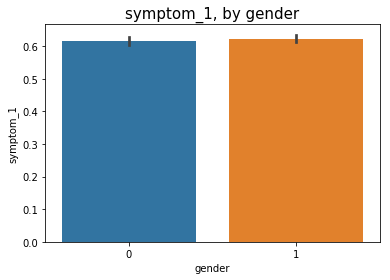

In [86]:
# Symptom 1 by gender
sns.barplot(x=merged['gender'],y = merged['symptom_1'])
plt.title('symptom_1, by gender', fontsize=15)

Text(0.5,1,'symptom_2, by gender')

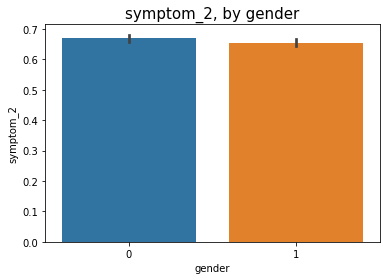

In [87]:
# Symptom 2 by gender
sns.barplot(x=merged['gender'],y = merged['symptom_2'])
plt.title('symptom_2, by gender', fontsize=15)

Text(0.5,1,'symptom_3, by gender')

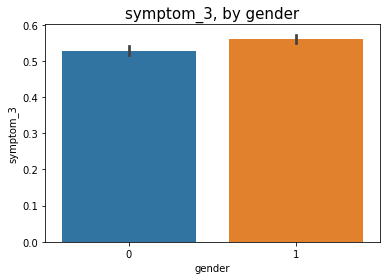

In [88]:
# Symptom 3 by gender
sns.barplot(x=merged['gender'],y = merged['symptom_3'])
plt.title('symptom_3, by gender', fontsize=15)

Text(0.5,1,'symptom_4, by gender')

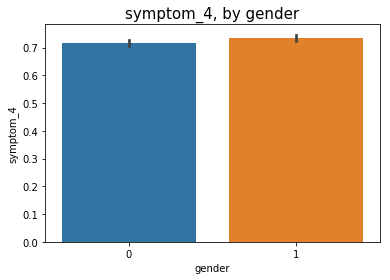

In [89]:
# Symptom 4 by gender
sns.barplot(x=merged['gender'],y = merged['symptom_4'])
plt.title('symptom_4, by gender', fontsize=15)

Text(0.5,1,'symptom_5, by gender')

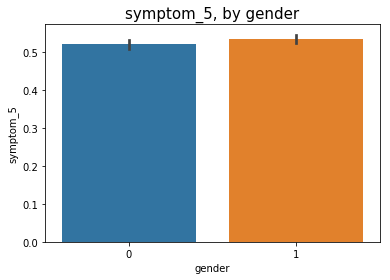

In [90]:
# Symptom 5 by gender
sns.barplot(x=merged['gender'],y = merged['symptom_5'])
plt.title('symptom_5, by gender', fontsize=15)

Text(0.5,1,'Count, by race')

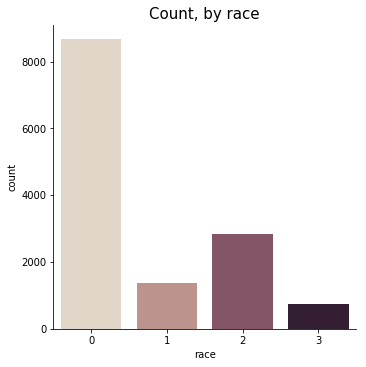

In [91]:
# Count, by race
sns.catplot(x="race", kind="count", palette="ch:.25", data=merged);
plt.title('Count, by race', fontsize=15)

Text(0.5,1,'amount, by race')

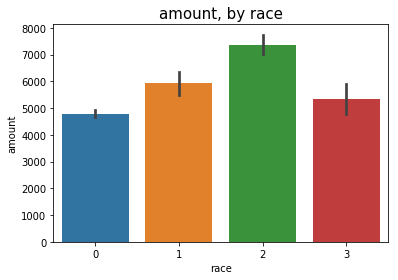

In [92]:
# Amount by race
sns.barplot(x=merged['race'],y = merged['amount'])
plt.title('amount, by race', fontsize=15)

Text(0.5,1,'medical_history_1, by race')

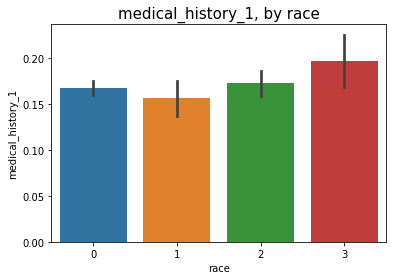

In [93]:
# Med Hist 1 by race
sns.barplot(x=merged['race'],y = merged['medical_history_1'])
plt.title('medical_history_1, by race', fontsize=15)

Text(0.5,1,'medical_history_6, by race')

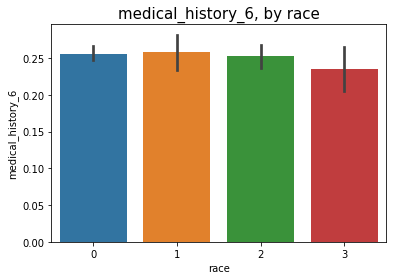

In [94]:
# Med hist 6 by race
sns.barplot(x=merged['race'],y = merged['medical_history_6'])
plt.title('medical_history_6, by race', fontsize=15)

Text(0.5,1,'symptom_1, by race')

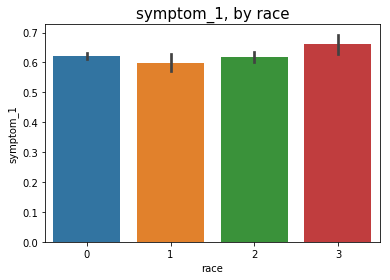

In [95]:
# Symptom 1 by race
sns.barplot(x=merged['race'],y = merged['symptom_1'])
plt.title('symptom_1, by race', fontsize=15)

Text(0.5,1,'symptom_2, by race')

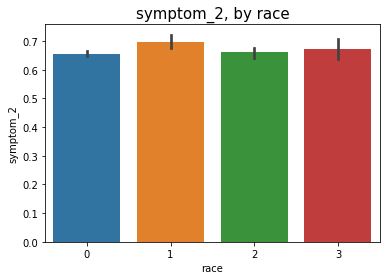

In [96]:
# Symptom 2 by race
sns.barplot(x=merged['race'],y = merged['symptom_2'])
plt.title('symptom_2, by race', fontsize=15)

Text(0.5,1,'symptom_3, by race')

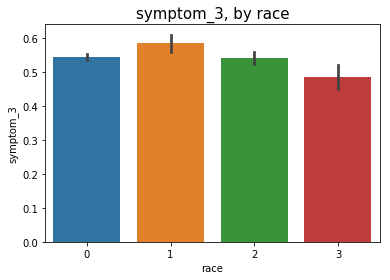

In [97]:
# Symptom 3 by race
sns.barplot(x=merged['race'],y = merged['symptom_3'])
plt.title('symptom_3, by race', fontsize=15)

Text(0.5,1,'symptom_4, by race')

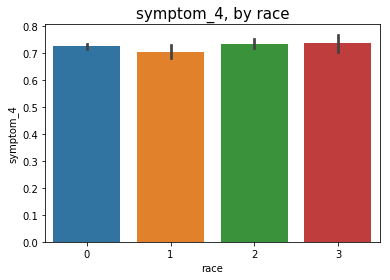

In [98]:
# Symptom_4 by race
sns.barplot(x=merged['race'],y = merged['symptom_4'])
plt.title('symptom_4, by race', fontsize=15)

Text(0.5,1,'symptom_5, by race')

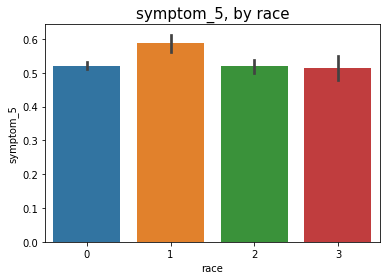

In [99]:
# Symptom 5 by race
sns.barplot(x=merged['race'],y = merged['symptom_5'])
plt.title('symptom_5, by race', fontsize=15)

Text(0.5,1,'Count, by age category')

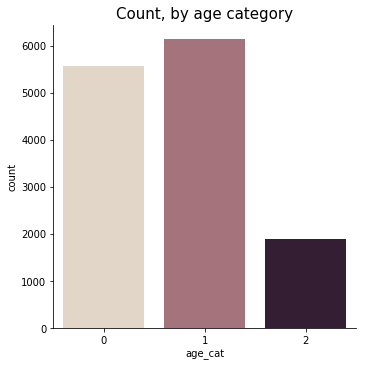

In [100]:
# Count, by race
sns.catplot(x="age_cat", kind="count", palette="ch:.25", data=merged);
plt.title('Count, by age category', fontsize=15)

Text(0.5,1,'amount, by age category')

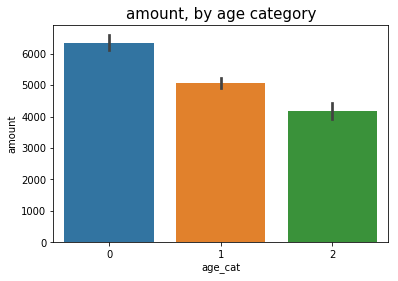

In [101]:
# Amount, by age cat
sns.barplot(x=merged['age_cat'],y = merged['amount'])
plt.title('amount, by age category', fontsize=15)

Text(0.5,1,'medical_history_1, by age category')

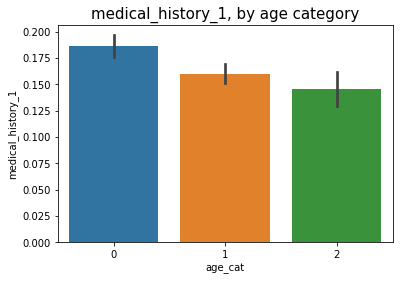

In [102]:
# Med Hist 1, by age cat
sns.barplot(x=merged['age_cat'],y = merged['medical_history_1'])
plt.title('medical_history_1, by age category', fontsize=15)

Text(0.5,1,'medical_history_6, by age category')

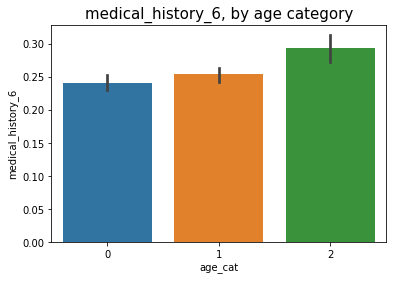

In [103]:
# Med Hist 6 by age cat
sns.barplot(x=merged['age_cat'],y = merged['medical_history_6'])
plt.title('medical_history_6, by age category', fontsize=15)

Text(0.5,1,'symptom_1, by age category')

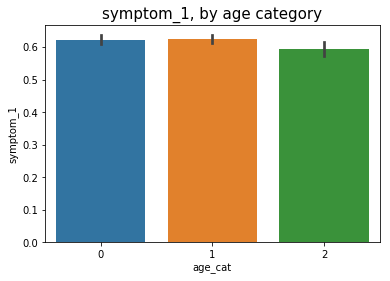

In [104]:
# Symptom 1 by age cat
sns.barplot(x=merged['age_cat'],y = merged['symptom_1'])
plt.title('symptom_1, by age category', fontsize=15)

Text(0.5,1,'symptom_2, by age category')

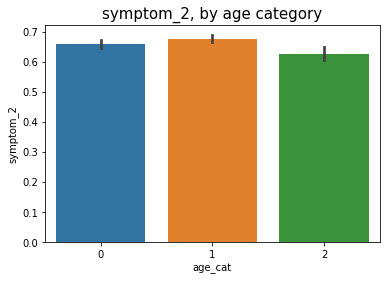

In [105]:
# Symptom 2 by age cat
sns.barplot(x=merged['age_cat'],y = merged['symptom_2'])
plt.title('symptom_2, by age category', fontsize=15)

Text(0.5,1,'symptom_3, by age category')

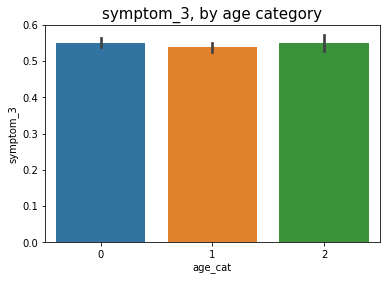

In [106]:
# Symptom 3 by age cat
sns.barplot(x=merged['age_cat'],y = merged['symptom_3'])
plt.title('symptom_3, by age category', fontsize=15)

Text(0.5,1,'symptom_4, by age_cat')

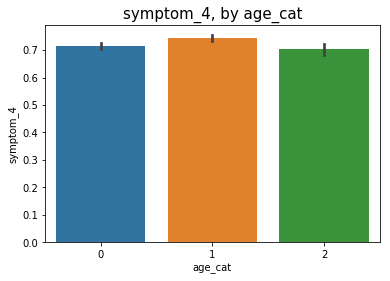

In [107]:
# Symptom 4 by age cat
sns.barplot(x=merged['age_cat'],y = merged['symptom_4'])
plt.title('symptom_4, by age_cat', fontsize=15)

Text(0.5,1,'symptom_5, by age category')

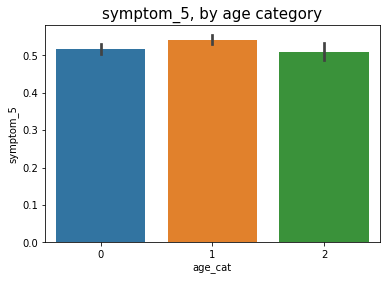

In [108]:
# Symptom 5 by age cat
sns.barplot(x=merged['age_cat'],y = merged['symptom_5'])
plt.title('symptom_5, by age category', fontsize=15)

Text(0.5,1,'Count, by Resident Status')

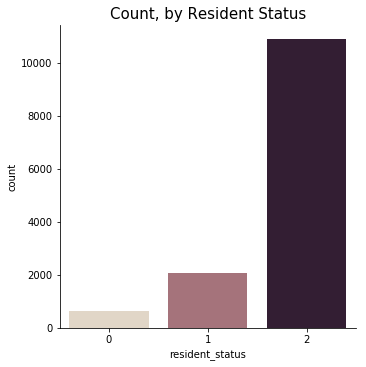

In [109]:
# Count, by BMI category
sns.catplot(x="resident_status", kind="count", palette="ch:.25", data=merged);
plt.title('Count, by Resident Status', fontsize=15)

Text(0.5,1,'Count, by BMI category')

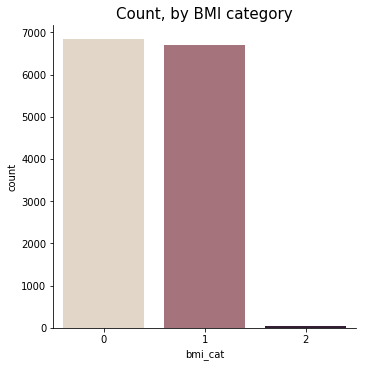

In [110]:
# Count, by BMI category
sns.catplot(x="bmi_cat", kind="count", palette="ch:.25", data=merged);
plt.title('Count, by BMI category', fontsize=15)

Text(0.5,1,'Count, by BMI category + Gender')

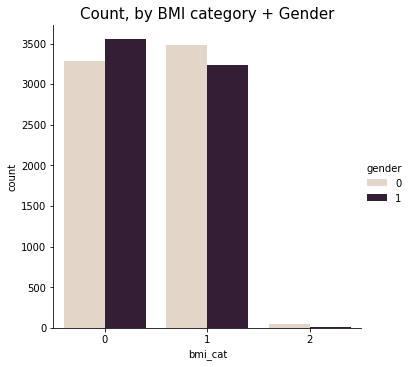

In [111]:
# Count, by BMI category
sns.catplot(x="bmi_cat", hue="gender", kind="count", palette="ch:.25", data=merged);
plt.title('Count, by BMI category + Gender', fontsize=15)

Text(0.5,1,'amount, by BMI category')

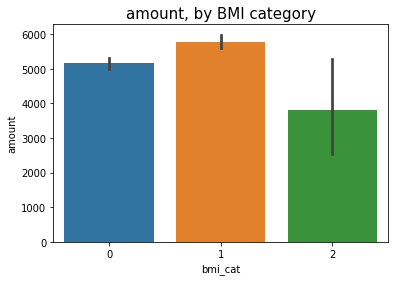

In [112]:
# Amount by BMI Cat
sns.barplot(x=merged['bmi_cat'],y = merged['amount'])
plt.title('amount, by BMI category', fontsize=15)

Text(0.5,1,'Amount by BMI + Gender')

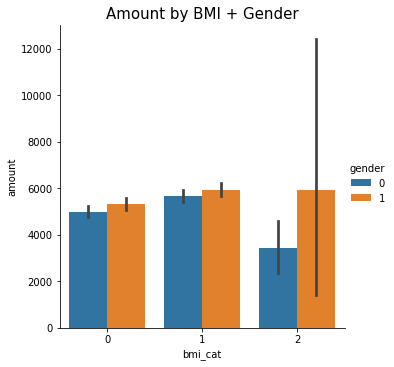

In [113]:
# Amt by BMI + Gender
sns.catplot(x="bmi_cat", y="amount", hue="gender", kind="bar", data=merged)
plt.title('Amount by BMI + Gender', fontsize=15)

Text(0.5,1,'medical_history_1, by BMI category')

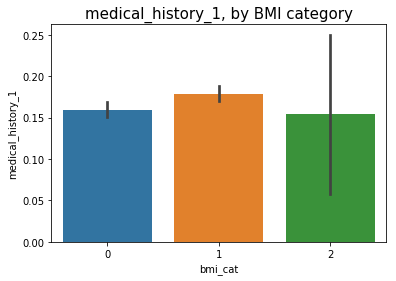

In [114]:
# Med Hist 1 by BMI Cat
sns.barplot(x=merged['bmi_cat'],y = merged['medical_history_1'])
plt.title('medical_history_1, by BMI category', fontsize=15)

Text(0.5,1,'medical_history_2, by BMI category')

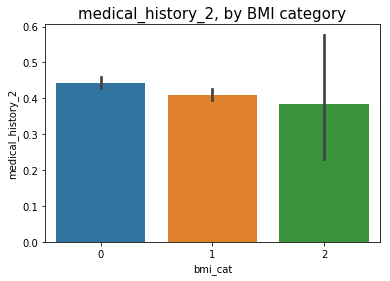

In [115]:
# Med Hist 2 by BMI Cat
sns.barplot(x=merged['bmi_cat'],y = merged['medical_history_2'])
plt.title('medical_history_2, by BMI category', fontsize=15)

Text(0.5,1,'medical_history_3, by BMI category')

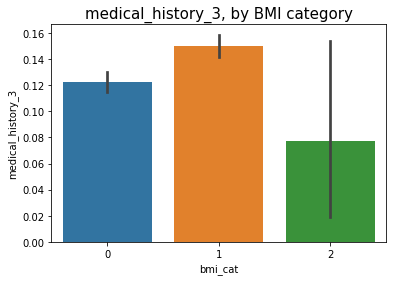

In [116]:
# Med Hist 3 by BMI cat
sns.barplot(x=merged['bmi_cat'],y = merged['medical_history_3'])
plt.title('medical_history_3, by BMI category', fontsize=15)

Text(0.5,1,'medical_history_5, by BMI category')

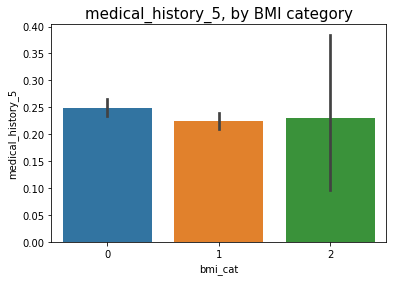

In [117]:
# BMI Cat med hist 5
sns.barplot(x=merged['bmi_cat'],y = merged['medical_history_5'])
plt.title('medical_history_5, by BMI category', fontsize=15)

Text(0.5,1,'medical_history_6, by BMI category')

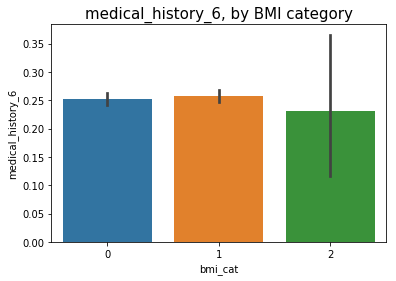

In [118]:
# Med Hist 6 by BMI Cat
sns.barplot(x=merged['bmi_cat'],y = merged['medical_history_6'])
plt.title('medical_history_6, by BMI category', fontsize=15)

Text(0.5,1,'preop_medication_4, by BMI category')

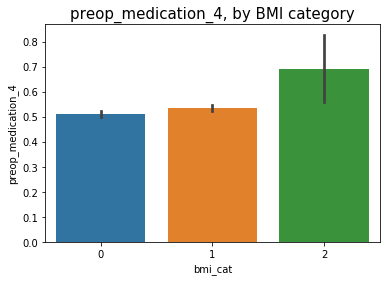

In [119]:
# Preop med 4, by BMI cat
sns.barplot(x=merged['bmi_cat'],y = merged['preop_medication_4'])
plt.title('preop_medication_4, by BMI category', fontsize=15)

Text(0.5,1,'Medical History 3 by BMI + Gender')

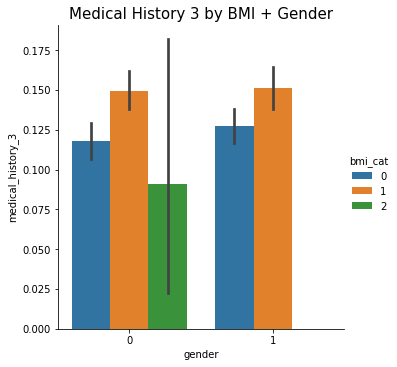

In [120]:
# Med Hist 3 by BMI + Gender
sns.catplot(x="gender", y="medical_history_3", hue="bmi_cat", kind="bar", data=merged)
plt.title('Medical History 3 by BMI + Gender', fontsize=15)

Text(0.5,1,'Medical History 1 by BMI + Gender')

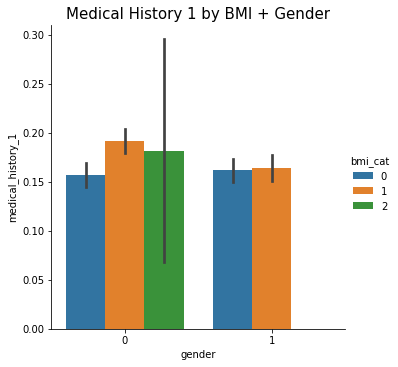

In [121]:
# MEd Hist 1 by BMI + Gender
sns.catplot(x="gender", y="medical_history_1", hue="bmi_cat", kind="bar", data=merged)
plt.title('Medical History 1 by BMI + Gender', fontsize=15)

Text(0.5,1,'Amount by Race + Gender')

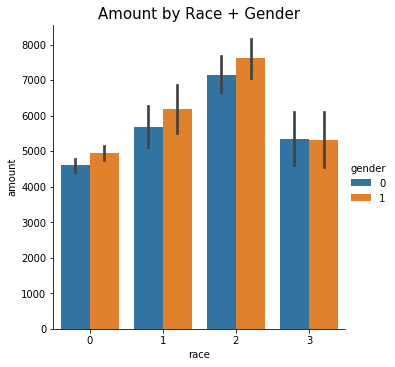

In [122]:
# Amt by Race + Gender
sns.catplot(x="race", y="amount", hue="gender", kind="bar", data=merged)
plt.title('Amount by Race + Gender', fontsize=15)

In [ ]:
# Amt by Race + Age
sns.catplot(x="race", y="amount", hue="age_cat", kind="bar", data=merged)
plt.title('Amount by Race + Age', fontsize=15)

In [ ]:
# Amt by Age + Gender
sns.catplot(x="gender", y="amount", hue="age_cat", kind="bar", data=merged)
plt.title('Amount by Age + Gender', fontsize=15)

In [ ]:
# Symptom 5 = NO
p = figure(plot_width=500, plot_height=450, title='Scatterplot, Amount Progression By Age, [Symptom 5 = NO]')
p.circle(x=merged[(merged.symptom_5 == 0)].age,y=merged[(merged.symptom_5 == 0)].amount, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [ ]:
# Symptom 5 = YES
p = figure(plot_width=500, plot_height=450, title='Scatterplot, Amount Progression By Age, [Symptom 5 = YES]')
p.circle(x=merged[(merged.symptom_5 == 1)].age,y=merged[(merged.symptom_5 == 1)].amount, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

In [ ]:
# Symptom 5 = YES and Symptom 5 = NO
sns.lmplot(x="age", y="amount", hue="symptom_5", data=merged, palette = 'inferno_r', size = 7)
ax.set_title('symptom_5 YES and symptom_5 NO')

In [ ]:
# Healthy
p = figure(plot_width=500, plot_height=450, title="Scatterplot, Amount Progression By Age, Healthy Weight")
p.circle(x=merged[(merged.bmi_cat == 0)].age,y=merged[(merged.bmi_cat == 0)].amount, size=7, line_color="navy", fill_color="cyan", fill_alpha=0.9)

show(p)

In [ ]:
# Overweight
p = figure(plot_width=500, plot_height=450, title="Scatterplot, Amount Progression By Age, Overweight")
p.circle(x=merged[(merged.bmi_cat == 1)].age,y=merged[(merged.bmi_cat == 1)].amount, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)

show(p)

In [ ]:
# Underweight
p = figure(plot_width=500, plot_height=450, title="Scatterplot, Amount Progression By Age, Underweight")
p.circle(x=merged[(merged.bmi_cat == 2)].age,y=merged[(merged.bmi_cat == 2)].amount, size=7, line_color="navy", fill_color="violet", fill_alpha=0.9)

show(p)

In [ ]:
# All Weights
sns.lmplot(x="age", y="amount", hue="bmi_cat", data=merged, palette = 'inferno_r', size = 7)
ax.set_title('Amount Progression By Age, All Weight Categories')